In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# link to dataset - https://www.kaggle.com/datasets/harunrai/digital-wallet-transactions/data

df=pd.read_csv(r'digital_wallet_transactions.csv')


In [4]:
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [15]:
df.head(10)

,idx,transaction_id,user_id,transaction_date,product_category,product_name,merchant_name,product_amount,transaction_fee,cashback,loyalty_points,payment_method,transaction_status,merchant_id,device_type,location,date,hour
0,1,4dac3ea3-6492-46ec-80b8-dc45c3ad0b14,USER_05159,2023-08-19 03:32:00,Rent Payment,2BHK Flat Deposit,Airbnb,1525.39,36.69,19.19,186,Debit Card,Successful,MERCH_0083,iOS,Urban,2023-08-19,03:32
1,2,a903ed9f-eb84-47e7-b8aa-fd1786c919cf,USER_07204,2023-08-19 04:37:00,Gas Bill,Commercial Gas Connection,Adani Gas,1495.40,28.19,89.99,182,UPI,Successful,MERCH_0163,iOS,Urban,2023-08-19,04:37
2,3,2a393013-733c-4add-9f09-bed1eeb33676,USER_00903,2023-08-19 05:52:00,Bus Ticket,Semi-Sleeper,MakeMyTrip Bus,1267.71,11.36,95.70,994,UPI,Successful,MERCH_0320,iOS,Urban,2023-08-19,05:52
3,4,9a07ad19-4673-4794-9cd2-9b139f39c715,USER_01769,2023-08-19 06:35:00,Internet Bill,4G Unlimited Plan,Airtel Broadband,9202.63,6.41,82.24,409,Debit Card,Successful,MERCH_0194,Android,Urban,2023-08-19,06:35
4,5,76418260-c985-4011-979d-0914604d0d68,USER_03544,2023-08-19 06:36:00,Loan Repayment,Home Loan EMI,Axis Bank,3100.58,41.15,40.47,837,Debit Card,Successful,MERCH_0504,Android,Urban,2023-08-19,06:36
5,6,2ee6c8d8-9e9e-47b6-95e8-932af851ca43,USER_07548,2023-08-19 06:46:00,Flight Booking,Delhi to Mumbai,Yatra,8430.75,44.55,52.61,269,UPI,Successful,MERCH_0476,Android,Urban,2023-08-19,06:46
6,7,89df83e5-98d3-4c0f-b273-59b0d057fc34,USER_05280,2023-08-19 07:15:00,Hotel Booking,Villa,Treebo,6688.17,49.62,22.18,58,UPI,Successful,MERCH_0441,Android,Urban,2023-08-19,07:15
7,8,1a8ab910-657a-4e57-90ec-90420290e8a1,USER_03459,2023-08-19 07:57:00,Gas Bill,Piped Natural Gas,Adani Gas,1802.28,0.11,14.56,950,UPI,Successful,MERCH_0938,iOS,Urban,2023-08-19,07:57
8,9,48fc902d-0952-4a20-9d57-b54663affe79,USER_04329,2023-08-19 09:14:00,Internet Bill,Broadband 50Mbps Plan,Airtel Broadband,4262.28,2.66,67.63,675,UPI,Successful,MERCH_0156,iOS,Urban,2023-08-19,09:14
9,10,19c7d2d5-8566-42ba-95aa-8d803cfeeffd,USER_07264,2023-08-19 10:01:00,Insurance Premium,Term Life Policy,Max Life,2207.90,45.70,21.87,129,Wallet Balance,Successful,MERCH_0245,iOS,Urban,2023-08-19,10:01


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   idx                 5000 non-null   int64         
 1   transaction_id      5000 non-null   object        
 2   user_id             5000 non-null   object        
 3   transaction_date    5000 non-null   datetime64[ns]
 4   product_category    5000 non-null   object        
 5   product_name        5000 non-null   object        
 6   merchant_name       5000 non-null   object        
 7   product_amount      5000 non-null   float64       
 8   transaction_fee     5000 non-null   float64       
 9   cashback            5000 non-null   float64       
 10  loyalty_points      5000 non-null   int64         
 11  payment_method      5000 non-null   object        
 12  transaction_status  5000 non-null   object        
 13  merchant_id         5000 non-null   object      

In [17]:
df.describe()

,idx,product_amount,transaction_fee,cashback,loyalty_points
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,4957.502722,25.188874,50.658782,498.790400
std,1443.520003,2885.034160,14.535298,28.522467,288.962434
min,1.000000,10.090000,0.010000,0.000000,0.000000
25%,1250.750000,2453.977500,12.665000,26.495000,246.000000
50%,2500.500000,4943.685000,25.070000,51.390000,504.000000
75%,3750.250000,7444.815000,37.947500,75.067500,749.000000
max,5000.000000,9996.950000,49.990000,100.000000,999.000000


In [14]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['date'] = df['transaction_date'].dt.date
df['hour'] = df['transaction_date'].dt.strftime('%H:%M')

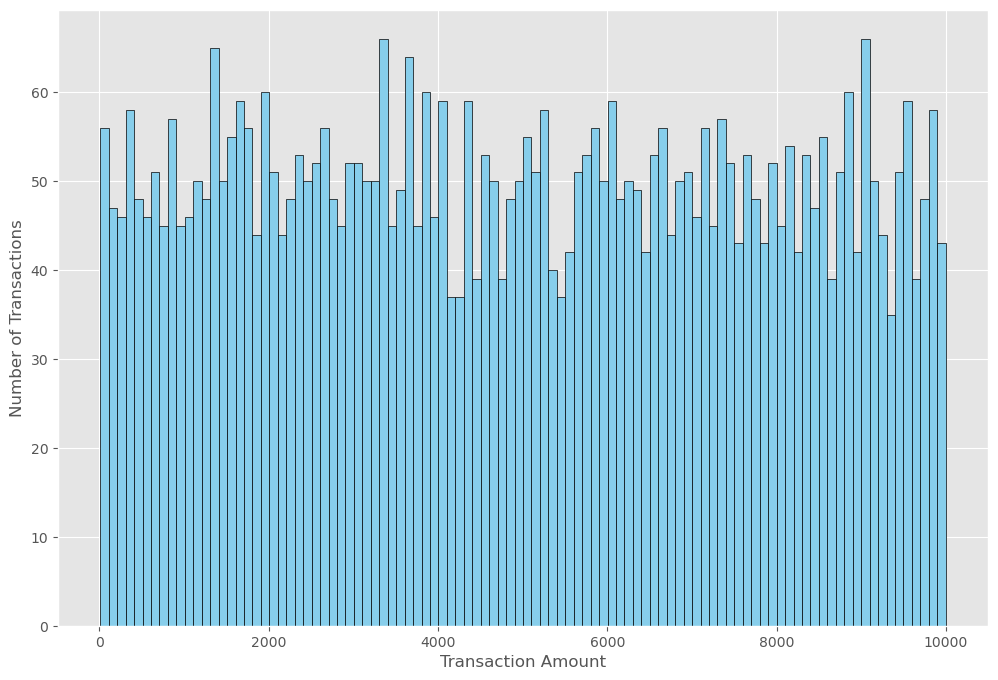

In [72]:
plt.hist(df['product_amount'],bins=100,histtype='bar',color='skyblue',edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.show()

In [33]:
sales_by_product_category=df.groupby('product_category')['product_amount'].sum()
sales_by_product_category = sales_by_product_category.sort_values(ascending=False)
sales_by_product_category

product_category
Streaming Service    1462461.66
Water Bill           1400668.85
Gas Bill             1361519.80
Education Fee        1349321.77
Movie Ticket         1337399.89
Hotel Booking        1319603.90
Food Delivery        1317106.21
Taxi Fare            1306566.24
Rent Payment         1258263.69
Internet Bill        1247178.07
Electricity Bill     1245972.74
Loan Repayment       1210681.76
Online Shopping      1207396.13
Mobile Recharge      1196334.68
Gaming Credits       1136665.44
Grocery Shopping     1134972.71
Flight Booking       1124283.05
Bus Ticket           1115711.58
Insurance Premium    1032608.99
Gift Card            1022796.45
Name: product_amount, dtype: float64

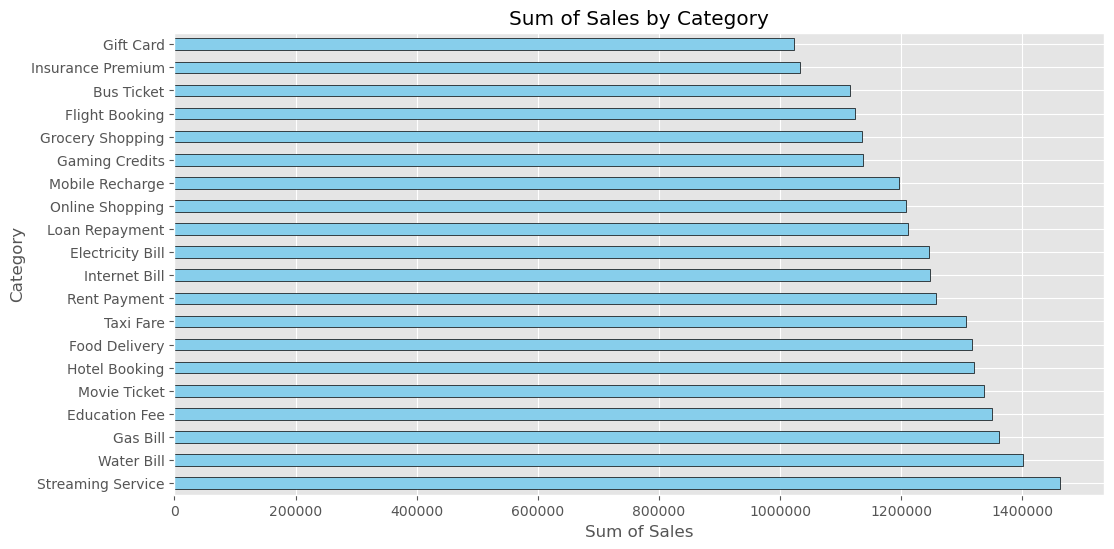

In [35]:
plt.figure(figsize=(12, 6))
sales_by_product_category.plot(kind='barh', color='skyblue', edgecolor='black')


plt.ylabel('Category')
plt.xlabel('Sum of Sales')
plt.title('Sum of Sales by Category')
plt.ticklabel_format(axis = 'x' , style = 'plain')
plt.xticks(rotation=0)


plt.show()

In [37]:
cashback_mean = df.groupby('product_category')['cashback'].mean()
cashback_mean = cashback_mean.sort_values(ascending=False)
cashback_mean

product_category
Food Delivery        52.426293
Electricity Bill     52.394087
Flight Booking       52.343241
Gift Card            52.267602
Rent Payment         51.776653
Taxi Fare            51.763984
Streaming Service    51.344849
Grocery Shopping     50.812647
Movie Ticket         50.787684
Mobile Recharge      50.711992
Water Bill           50.625385
Internet Bill        50.432575
Bus Ticket           50.423404
Education Fee        50.278042
Hotel Booking        49.783832
Online Shopping      49.367325
Insurance Premium    49.285778
Loan Repayment       48.998816
Gas Bill             48.730640
Gaming Credits       48.535887
Name: cashback, dtype: float64

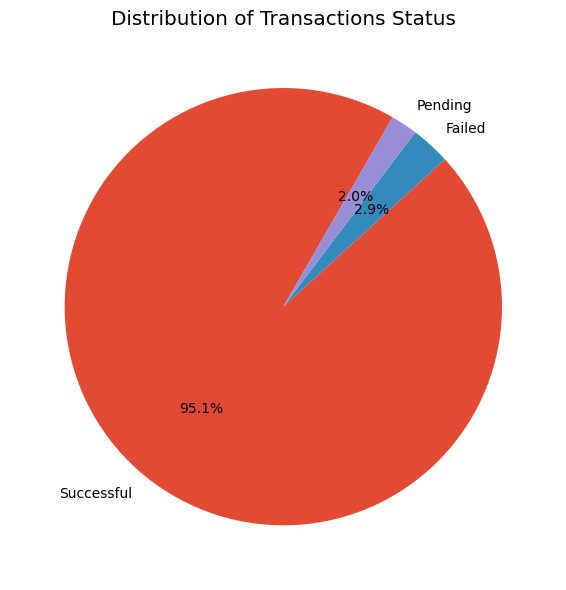

In [42]:
status_counts = df['transaction_status'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%',startangle=60)

plt.ylabel('') 
plt.title('Distribution of Transactions Status')
plt.tight_layout()

plt.show()

In [63]:
category_sales_by_payment_method = pd.pivot_table(df, 
                             index='product_category', 
                             columns='payment_method', 
                             aggfunc='size', 
                             fill_value=0)


category_sales_by_payment_method = category_sales_by_payment_method.style.background_gradient(cmap='YlGnBu', axis=None).set_table_styles(
                [{'selector': 'th', 'props': [('text-align', 'center'), ('width', '100px')]},  
                {'selector': 'td', 'props': [('width', '100px')]}]    
)


category_sales_by_payment_method


payment_method,Bank Transfer,Credit Card,Debit Card,UPI,Wallet Balance
product_category,,,,,
Bus Ticket,66,45,43,42,39
Education Fee,58,47,63,71,47
Electricity Bill,52,51,60,44,45
Flight Booking,41,39,39,51,46
Food Delivery,56,47,56,60,40
Gaming Credits,53,48,40,41,49
Gas Bill,59,42,62,41,46
Gift Card,48,47,46,42,38
Grocery Shopping,50,46,44,48,50


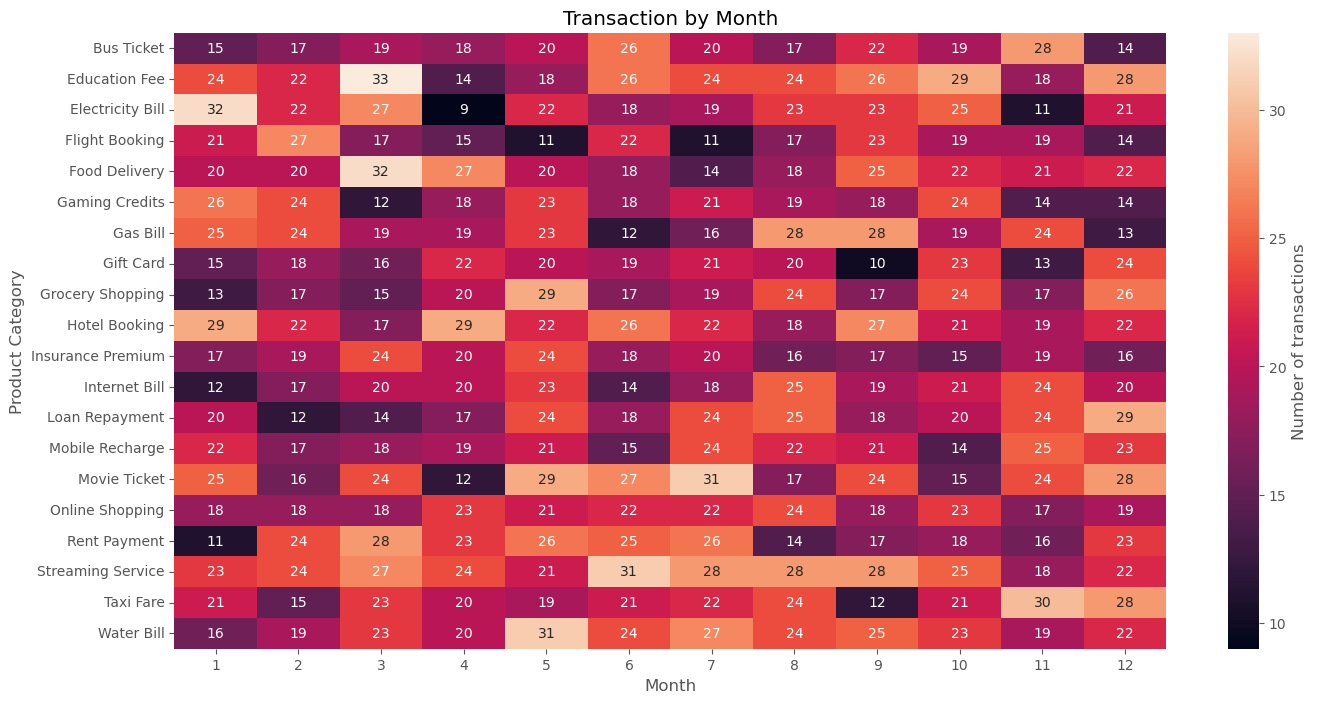

In [71]:
df.date=df['transaction_date'].dt.month
category_sales_by_month=pd.pivot_table(df,
                                            index='product_category',
                                      columns='date',
                                      aggfunc='size',
                                      fill_value=0)

plt.figure(figsize= (16,8))
sns.heatmap(category_sales_by_month, annot = True, cbar_kws={'label': 'Number of transactions'})
plt.title('Transaction by Month')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.show()